In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 

In [183]:
df = pd.read_csv('Fish.csv', delimiter = ',')
df.set_index('Species')

,Weight,Length1,Length2,Length3,Height,Width
Species,,,,,,
Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558


In [184]:
df.isnull().any()

Species    False
Weight     False
Length1    False
Length2    False
Length3    False
Height     False
Width      False
dtype: bool

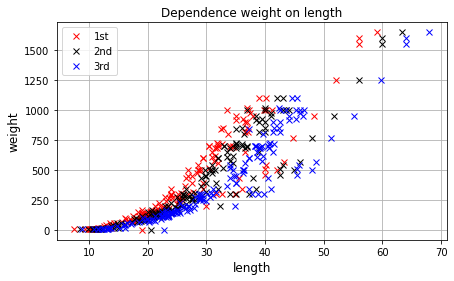

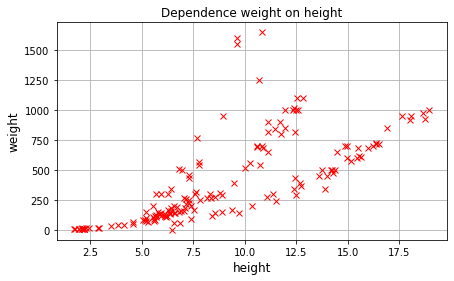

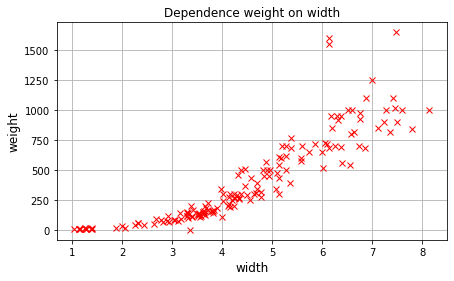

In [185]:
fig, ax = plt.subplots(figsize = (7, 4))
plt.title('Dependence weight on length')
ax.set_xlabel('length', fontsize = 12)
ax.set_ylabel('weight', fontsize = 12)
plt.plot(df['Length1'], df['Weight'], 'bx', color = 'red', label = '1st')
plt.plot(df['Length2'], df['Weight'], 'bx', color = 'black', label = '2nd')
plt.plot(df['Length3'], df['Weight'], 'bx', color = 'blue', label = '3rd')
plt.legend()
plt.grid()
plt.show()
fig, ax = plt.subplots(figsize = (7, 4))
plt.title('Dependence weight on height')
ax.set_xlabel('height', fontsize = 12)
ax.set_ylabel('weight', fontsize = 12)
plt.plot(df['Height'], df['Weight'], 'bx', color = 'red')
plt.grid()
plt.show()
fig, ax = plt.subplots(figsize = (7, 4))
plt.title('Dependence weight on width')
ax.set_xlabel('width', fontsize = 12)
ax.set_ylabel('weight', fontsize = 12)
plt.plot(df['Width'], df['Weight'], 'bx', color = 'red')
plt.grid()
plt.show()

In [186]:
x_train, x_test, y_train, y_test = train_test_split(df['Length1'].values, df['Weight'].values, 
                                                    train_size=0.5)

In [187]:
model = LinearRegression().fit(x_train.reshape(-1, 1), y_train)

In [188]:
b0 = model.intercept_
b1 = float(model.coef_)
def func(x):
    return b0 + b1*x

In [189]:
y_pred = model.predict(x_test.reshape(-1, 1))

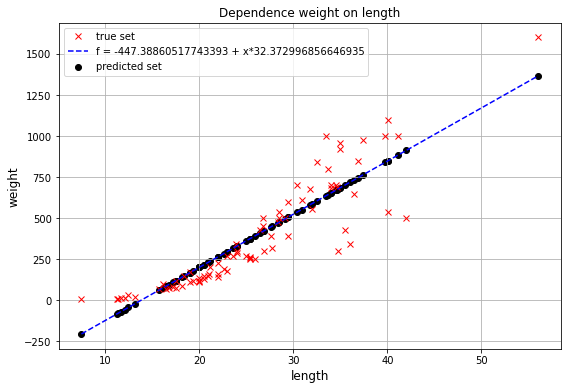

Prediction accuracy:  0.8133185370273096


In [190]:
fig, ax = plt.subplots(figsize = (9, 6))
plt.title('Dependence weight on length')
ax.set_xlabel('length', fontsize = 12)
ax.set_ylabel('weight', fontsize = 12)
plt.plot(x_test, y_test, 'bx', color = 'red', label = 'true set')
plt.scatter(x_test, y_pred, color = 'black', label = 'predicted set')
X = np.linspace(min(x_test), max(x_test), 100)
plt.plot(X, func(X), 'b--', label = f'f = {b0} + x*{b1}')
plt.legend()
plt.grid()
plt.show() 
print('Prediction accuracy: ', r2_score(y_test.reshape(-1, 1), y_pred))

In [191]:
X = df[['Length1', 'Length2', 'Length3', 'Height', 'Width']].values
y = df['Weight'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5)

In [192]:
model = LinearRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)
ridge_model = Ridge().fit(X_train, y_train)
y_ridge_pred = ridge_model.predict(X_test)
lasso_model = Lasso(max_iter=10000).fit(X_train, y_train)
y_lasso_pred = lasso_model.predict(X_test)
elastic_model = ElasticNet().fit(X_train, y_train)
y_elastic_pred = elastic_model.predict(X_test)
preds = (y_pred, y_ridge_pred, y_lasso_pred, y_elastic_pred)
titles = ('Classic linear regression', 'Ridge regression', 'Lasso regression', 'ElasticNet regression')

Prediction accuracy for Classic linear regression:  0.8691948420857136
Prediction accuracy for Ridge regression:  0.8727869727598274
Prediction accuracy for Lasso regression:  0.8736543748070041
Prediction accuracy for ElasticNet regression:  0.8793862046745982


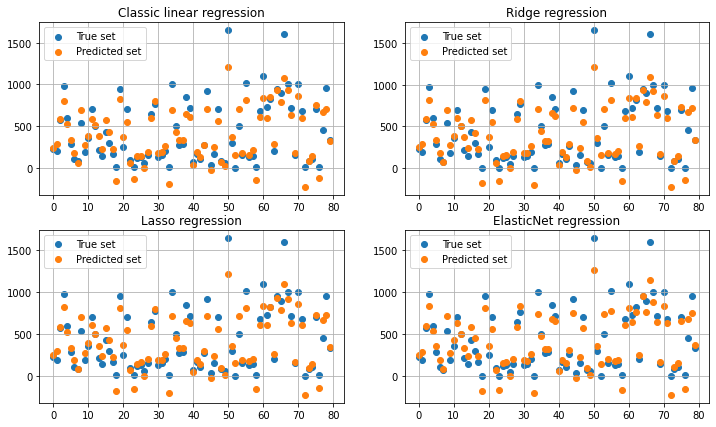

In [194]:
plt.figure(figsize=(12, 7))
i=1
for j in range(len(preds)):
    plt.subplot(2, 2, i)
    i+=1
    plt.title(f'{titles[j]}')
    plt.scatter([i for i in range(len(y_test))], y_test, label = 'True set')
    plt.scatter([i for i in range(len(y_test))], preds[j], label = 'Predicted set')
    plt.legend()
    plt.grid()
    print(f'Prediction accuracy for {titles[j]}: ', r2_score(y_test.reshape(-1, 1), preds[j]))


In [195]:
def ensemble(true_y, predictions):
    errors = []
    for pred in predictions:
        errors.append(true_y - pred)
    min_errors = []
    for i in range(len(errors[0])):
        min_errors.append(min((errors[j][i] for j in range(len(errors))), key = abs))
    return true_y + min_errors

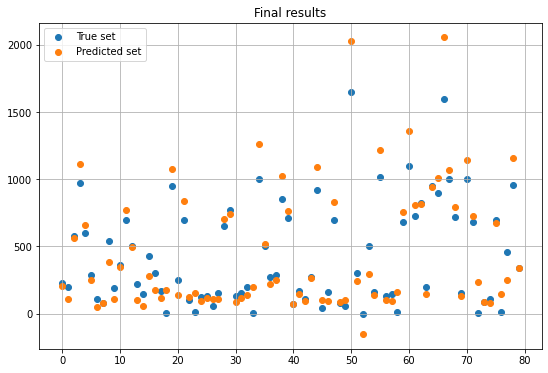

Prediction accuracy:  0.89466811991085


In [196]:
final_prediction = ensemble(y_test, [y_pred, y_elastic_pred, y_lasso_pred, y_ridge_pred])
fig, ax = plt.subplots(figsize = (9, 6))
plt.title('Final results')
plt.scatter([i for i in range(len(y_test))], y_test, label = 'True set')
plt.scatter([i for i in range(len(y_test))], final_prediction, label = 'Predicted set')
plt.legend()
plt.grid()
plt.show()
print('Prediction accuracy: ', r2_score(y_test.reshape(-1, 1), final_prediction))